# **_1. Dataset Generation_**

In [ ]:
%pip install sdv
%pip install urllib3==1.25.4

In [ ]:
import pandas as pd
from sdv.lite import SingleTablePreset

In [ ]:
df = pd.read_excel("diabetes2.xlsx")

In [ ]:
print(df.head)

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [ ]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=df)

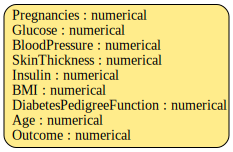

In [ ]:
metadata.visualize()

In [ ]:
synthesizer = SingleTablePreset(
    metadata,
    name='FAST_ML'
)

In [ ]:
synthesizer.fit(
    data=df
)

In [ ]:
synthetic_data = synthesizer.sample(
    num_rows=500
)

synthetic_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,149,96,19,10,38.387409,0.561331,40,1
1,0,151,44,6,105,26.125923,0.463959,27,1
2,3,169,57,24,240,33.224573,0.541364,36,0
3,4,86,61,35,0,32.918264,0.526311,39,0
4,6,75,62,31,77,37.453830,0.178734,21,0


In [ ]:
synthetic_data.to_csv("sampled_data.csv", index=False)



```
# This is formatted as code
```

# ***2. Preprocess and perform exploratory data analysis of the dataset obtained***

#Performing Exploratory data analysis :

In [ ]:
df_sample=synthetic_data
df_sampl=synthetic_data

In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               500 non-null    int64  
 1   Glucose                   500 non-null    int64  
 2   BloodPressure             500 non-null    int64  
 3   SkinThickness             500 non-null    int64  
 4   Insulin                   500 non-null    int64  
 5   BMI                       500 non-null    float64
 6   DiabetesPedigreeFunction  500 non-null    float64
 7   Age                       500 non-null    int64  
 8   Outcome                   500 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 35.3 KB


In [ ]:
df_sample.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000
mean,4.006000,120.454000,71.080000,21.778000,97.290000,32.518053,0.511352,34.4500,0.330000
std,3.052967,33.702754,18.964517,13.916467,92.202932,7.887027,0.299594,10.0826,0.470684
min,0.000000,14.000000,22.000000,0.000000,0.000000,10.903340,0.078000,21.0000,0.000000
25%,2.000000,98.000000,58.000000,11.000000,1.000000,27.161187,0.255483,27.0000,0.000000
50%,4.000000,120.500000,71.000000,22.000000,78.000000,32.593184,0.508918,33.0000,0.000000
75%,6.000000,145.000000,85.000000,32.000000,165.000000,37.500736,0.735819,41.0000,1.000000
max,17.000000,199.000000,122.000000,55.000000,378.000000,59.937412,1.413874,73.0000,1.000000


In [ ]:
df_sample.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No Null values present

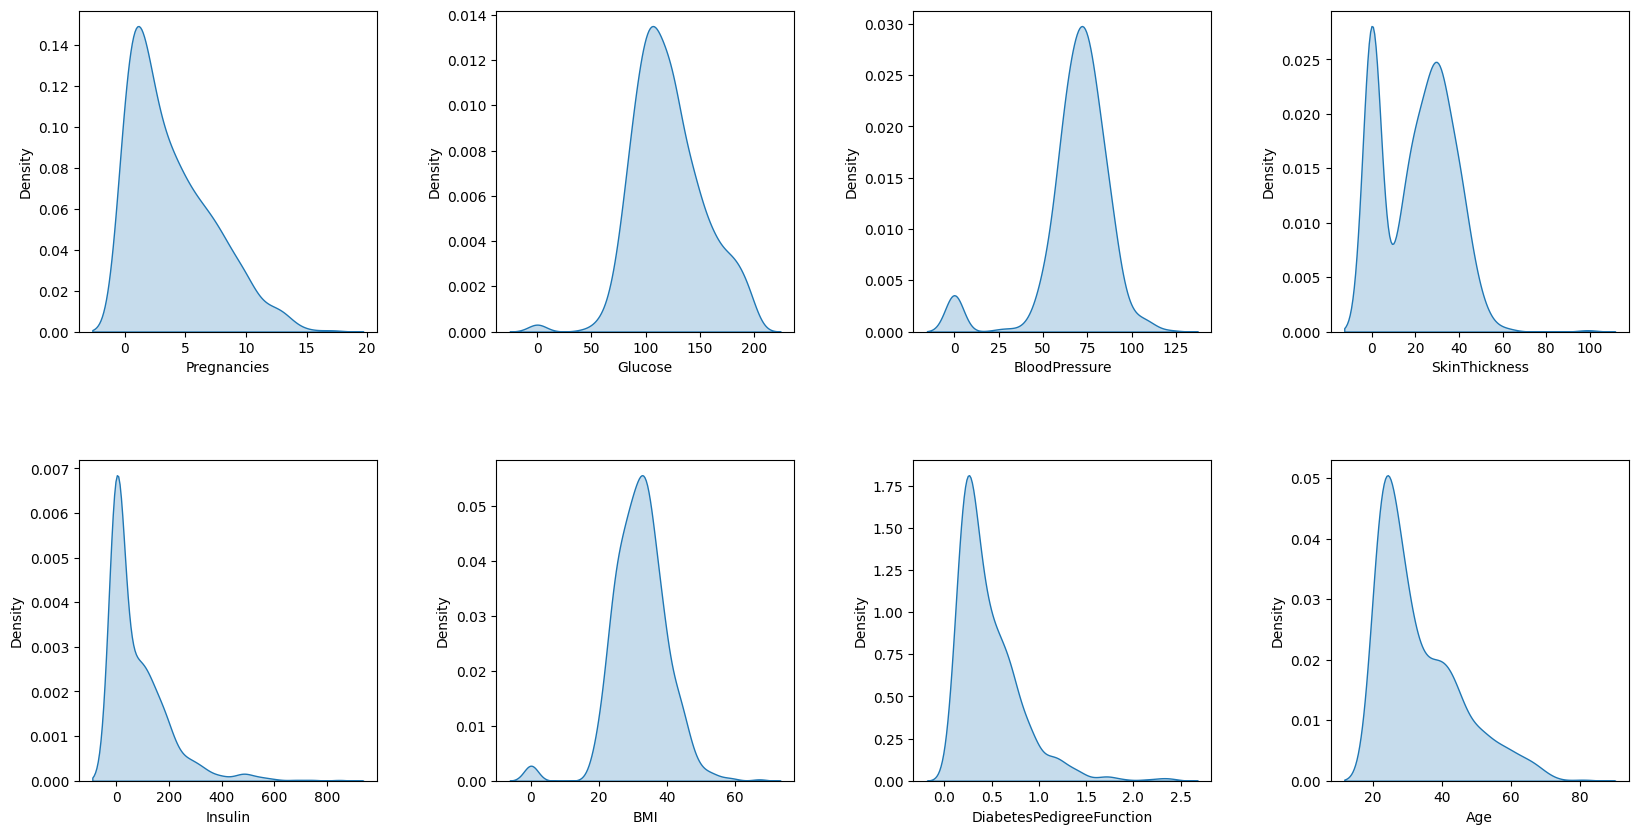

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#list of features we want to visualize
features = df_sample.columns[:-1]
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# spacing between subplots
fig.subplots_adjust(wspace=0.4, hspace=0.4)

# Kernel density estimate (KDE) plot for each feature in the grid of subplots
for i, feature in enumerate(features):
    sns.kdeplot(df[feature], ax=axes[i//4, i%4], fill=True)

plt.show()


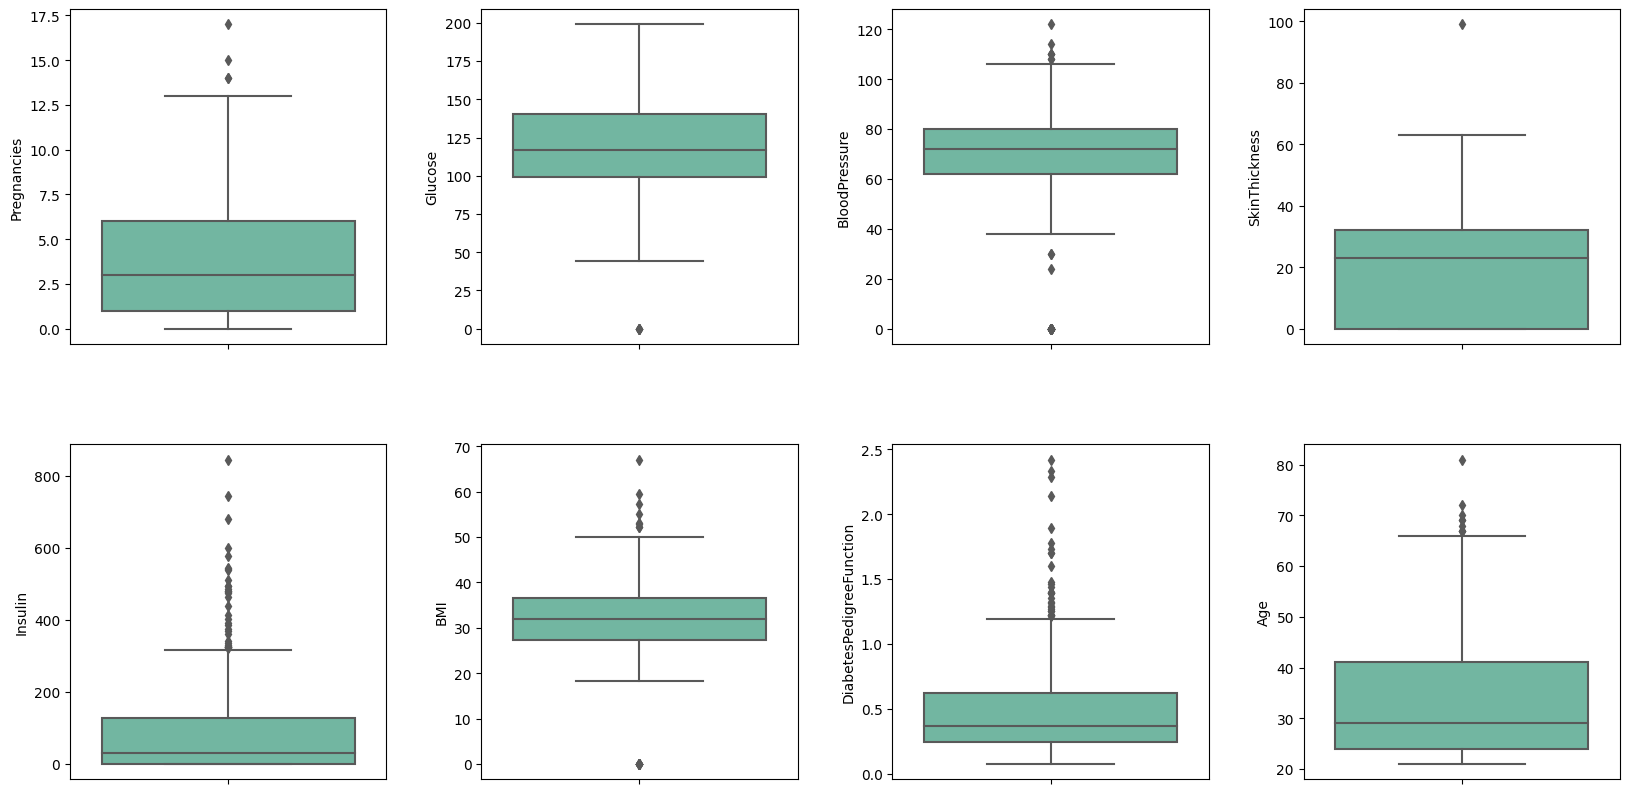

In [ ]:
# Visualizing Boxplot of each feature
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

for i, feature in enumerate(features):
    sns.boxplot(y=df[feature], ax=axes[i//4, i%4],palette='Set2')

plt.show()

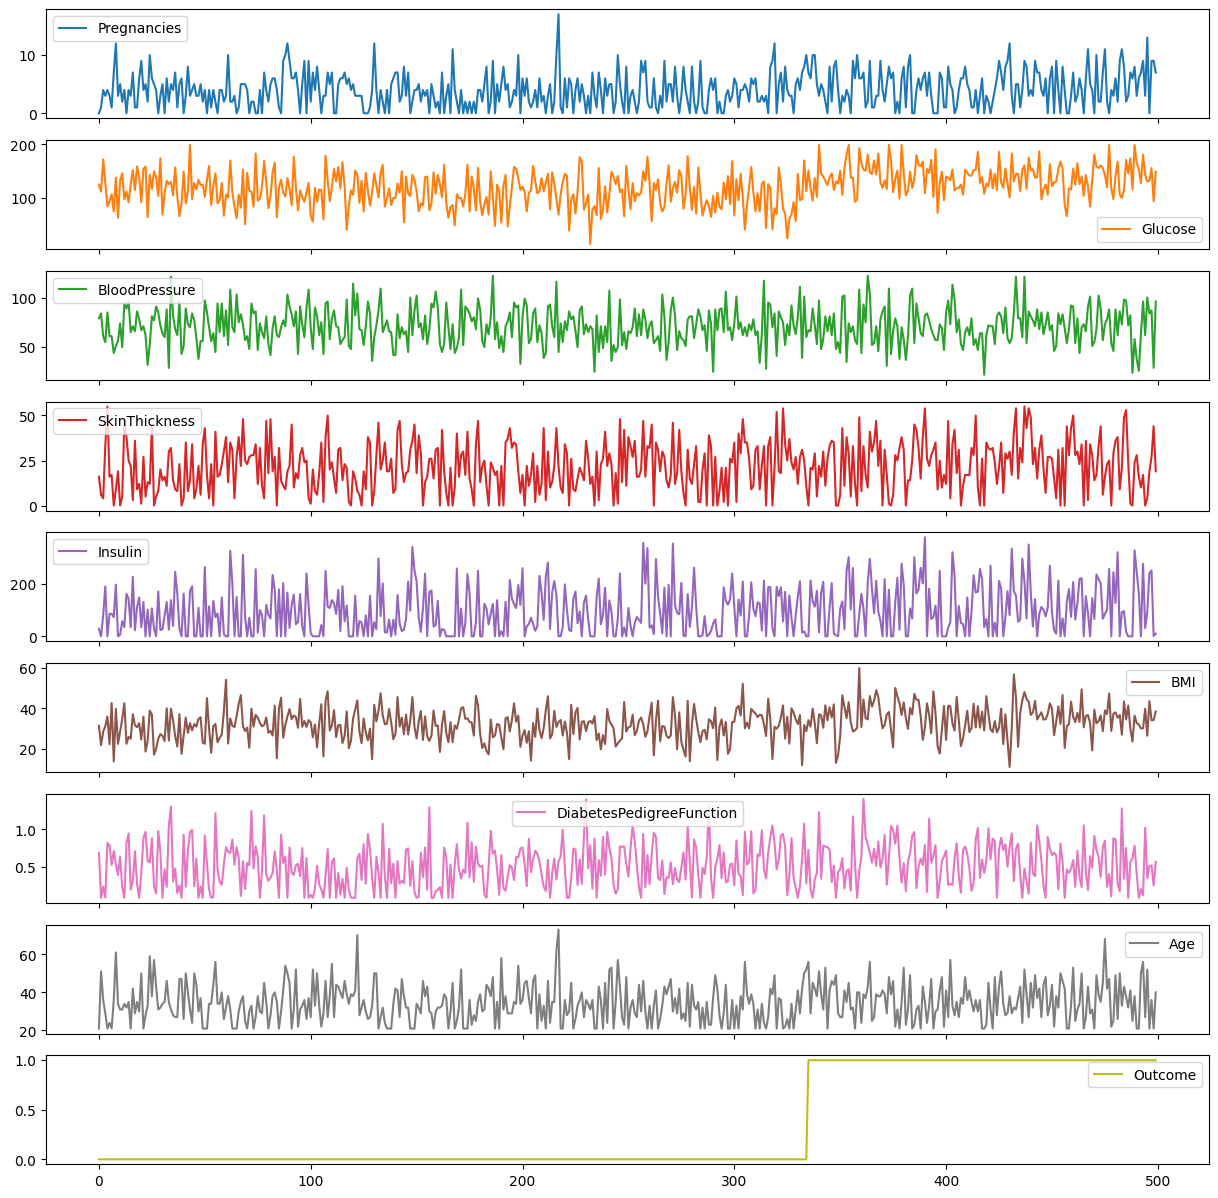

In [ ]:
#line graph
import pandas as pd
import matplotlib.pyplot as plt

df_sample.sort_values(by=["Outcome"], inplace=True, ignore_index=True)
df_sample.plot(figsize=(15, 15), subplots=True)

plt.show()


In [ ]:
# Outcome features destribtuion
df_sample['Outcome'].value_counts()

0    335
1    165
Name: Outcome, dtype: int64

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.056008       0.076867      -0.095012   
Glucose                      0.056008  1.000000       0.125647       0.048420   
BloodPressure                0.076867  0.125647       1.000000       0.276850   
SkinThickness               -0.095012  0.048420       0.276850       1.000000   
Insulin                      0.007312  0.388294       0.178255       0.386702   
BMI                         -0.069170  0.271193       0.293542       0.441714   
DiabetesPedigreeFunction    -0.112379  0.134433       0.063545       0.143424   
Age                          0.526535  0.217024       0.196416      -0.121843   
Outcome                      0.140868  0.395676       0.001302       0.102990   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.007312 -0.069170                 -0.112379   
Glucose                   0.388294  0.271

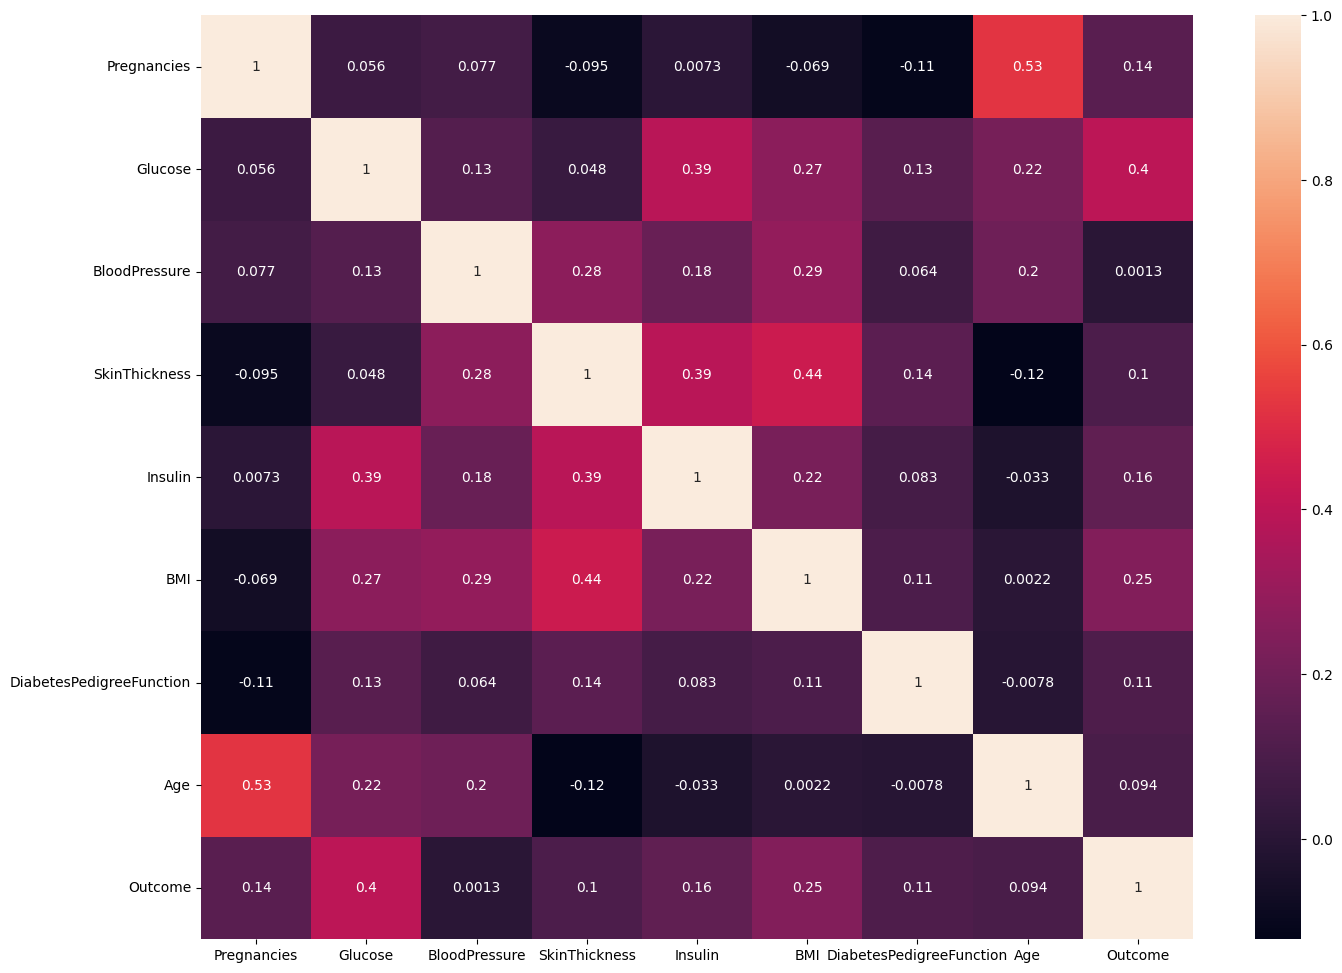

In [ ]:
#Correlation Heatmap
print(df_sample.corr())
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df_sample.corr(), annot=True)
plt.show()

#Performing Data Preprocessing:

##Null values check

In [ ]:
df_without_zeros = df_sample
df_without_outliers = df_sample

In [ ]:
df_sample.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No null values

##Remove 0's

In [ ]:
#get the number of 0s or, the number of non diabetes
print((df_without_zeros == 0).sum())
print('')
print('There are', (df_without_zeros['Outcome'] == 0).sum(axis = 0), 'non diabetes')
print('Which represent', ((df_without_zeros['Outcome'] == 0).sum(axis = 0) / len(df_without_zeros)) * 100, 'of the total')

#get the number of 1s or, the number of diabetes
print('There are', (df_without_zeros['Outcome'] == 1).sum(axis = 0), 'diabetes')
print('Which represent', ((df_without_zeros['Outcome'] == 1).sum(axis = 0) / len(df_without_zeros)) * 100, 'of the total')

Pregnancies                  84
Glucose                       0
BloodPressure                 0
SkinThickness                45
Insulin                     124
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     335
dtype: int64

There are 335 non diabetes
Which represent 67.0 of the total
There are 165 diabetes
Which represent 33.0 of the total


Analysis:

Variables that **makes sense to have zeroes in them**: *Pregnencies and Outcome*

Varibale that have **no zero**: *Glucose, BloodPressure , BMI ,DiabetesPedigreeFunction , Age*

Variables that **should not have zero but have**: *SkinThickness, Insulin*

In [ ]:
#define a new data set just for statistical analysis

df_stat = df_without_zeros[['SkinThickness', 'Insulin']]

#compute the % of 0 values in each column
zeros = (df_stat == 0).astype(int).sum(axis = 0)
percentage = ((df_stat == 0).astype(int).sum(axis = 0) / len(df_stat)) * 100
df_zeros = pd.DataFrame(zeros)
df_zeros['0 rate'] = percentage
df_zeros.columns = ['Count 0s', 'Percentage 0s']
df_zeros

,Count 0s,Percentage 0s
SkinThickness,45,9.0
Insulin,124,24.8


In [ ]:
display(df_stat.describe())

,SkinThickness,Insulin
count,500.000000,500.000000
mean,21.778000,97.290000
std,13.916467,92.202932
min,0.000000,0.000000
25%,11.000000,1.000000
50%,22.000000,78.000000
75%,32.000000,165.000000
max,55.000000,378.000000


In [ ]:
#Analyze the median of each feature grouped by the Outcome.

groupby_outcome = df_without_zeros.groupby('Outcome').agg({'SkinThickness': ['median'],'Insulin': ['median'],})
groupby_outcome = groupby_outcome.reset_index()
groupby_outcome.columns = ['Outcome', 'SkinThickness', 'Insulin']
groupby_outcome

,Outcome,SkinThickness,Insulin
0,0,20.0,65.0
1,1,25.0,101.0


These parameteres have a high influence on the final Outcome. Generally, just by checking the Glucose or the Insulin is sufficient to tell the Outcome. That is why, the 0 values will be replaced by the median of the column grouped by the Outcome target.

In other words: median of Outcome = 0, and median for Outcome = 1

In [ ]:
import numpy as np

cols = groupby_outcome.columns
cols = cols.drop(['Outcome'])
def fill_median(row):
    condition = (groupby_outcome['Outcome'] == row['Outcome']) #take the value based on the Outcome (0 or 1)
    return groupby_outcome[condition][cols].values[0]

df_without_zeros[cols]=df_without_zeros[cols].replace(0, np.nan)

In [ ]:
#for loop for each columns
#apply the function fill_median and replace NaN by median value
for cols in cols:
    df_without_zeros[cols] = df_without_zeros.apply(lambda row: fill_median(row) if np.isnan(row[cols]) else row[cols], axis = 1)

In [ ]:
df_without_zeros

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,125,79,16.0,29.0,31.328293,0.684088,21,0
1,1,112,84,6.0,65.0,21.731953,0.078000,51,0
2,4,172,61,4.0,80.0,28.438470,0.231383,36,0
3,3,127,55,33.0,190.0,31.148184,0.080043,29,0
4,4,84,85,55.0,65.0,35.911990,0.821649,21,0
...,...,...,...,...,...,...,...,...,...
495,13,131,100,4.0,95.0,26.445781,0.340675,52,1
496,0,132,84,19.0,241.0,43.554681,0.508274,21,1
497,9,156,87,27.0,251.0,34.064888,0.515060,36,1
498,9,94,29,44.0,1.0,34.140424,0.243524,21,1


In [ ]:
#defining a new data set just for statistical analysis

df_stat = df_without_zeros[['SkinThickness', 'Insulin']]

#computing the % of 0 values in each column
zeros = (df_stat == 0).astype(int).sum(axis = 0)
percentage = ((df_stat == 0).astype(int).sum(axis = 0) / len(df_stat)) * 100
df_zeros = pd.DataFrame(zeros)
df_zeros['0 rate'] = percentage
df_zeros.columns = ['Count 0s', 'Percentage 0s']
df_zeros

,Count 0s,Percentage 0s
SkinThickness,0,0.0
Insulin,0,0.0


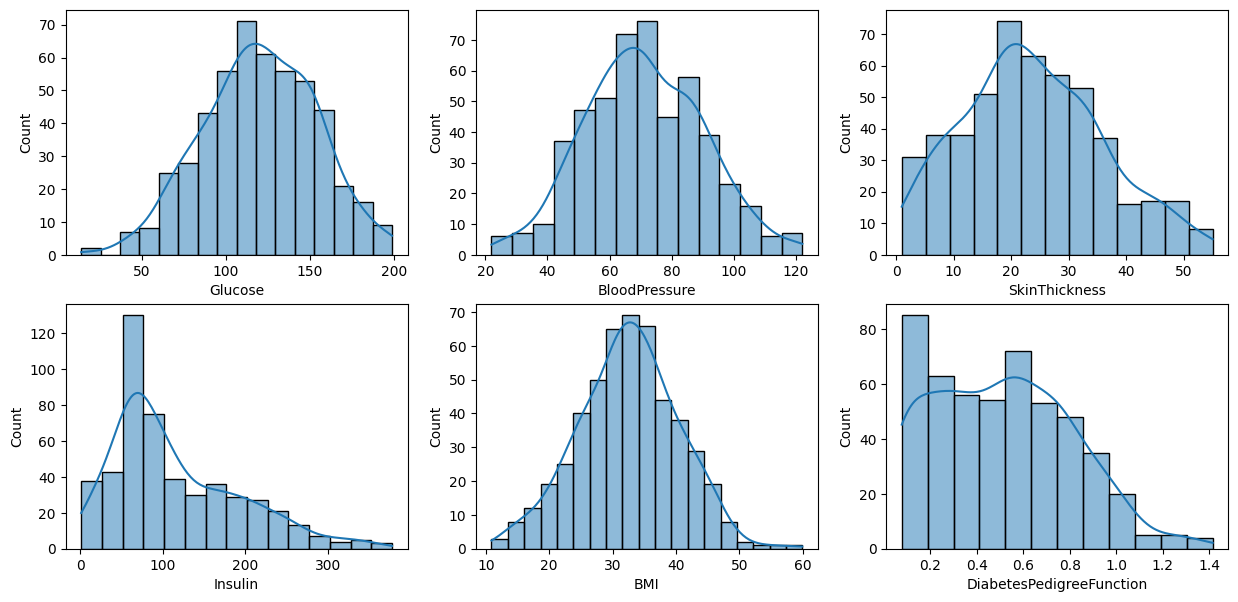

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(2,3,1)
sns.histplot(df_sample['Glucose'], kde = True)
plt.subplot(2,3,2)
sns.histplot(df_sample['BloodPressure'], kde = True)
plt.subplot(2,3,3)
sns.histplot(df_sample['SkinThickness'], kde = True)
plt.subplot(2,3,4)
sns.histplot(df_sample['Insulin'], kde = True)
plt.subplot(2,3,5)
sns.histplot(df_sample['BMI'], kde = True)
plt.subplot(2,3,6)
sns.histplot(df_sample['DiabetesPedigreeFunction'], kde = True)
plt.show()

## Removing Outliers

In [ ]:
import numpy as np

continuous_variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
                        "BMI", "DiabetesPedigreeFunction", "Age"]

for var in continuous_variables:
    Q1 = df_without_outliers[var].quantile(0.25)
    Q3 = df_without_outliers[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Replace values outside the lower and upper limits with NaN
    df_without_outliers.loc[(df_without_outliers[var] < lower_limit) | (df_without_outliers[var] > upper_limit), var] = np.nan

df_without_outliers.fillna(df_without_outliers.median(), inplace=True)


In [ ]:
df_without_outliers['Outcome'].value_counts()

0    335
1    165
Name: Outcome, dtype: int64

In [ ]:
df_without_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.0,125.0,79.0,16.0,29.0,31.328293,0.684088,21.0,0
1,1.0,112.0,84.0,6.0,65.0,21.731953,0.078000,51.0,0
2,4.0,172.0,61.0,4.0,80.0,28.438470,0.231383,36.0,0
3,3.0,127.0,55.0,33.0,190.0,31.148184,0.080043,29.0,0
4,4.0,84.0,85.0,55.0,65.0,35.911990,0.821649,21.0,0
...,...,...,...,...,...,...,...,...,...
495,4.0,131.0,100.0,4.0,95.0,26.445781,0.340675,52.0,1
496,0.0,132.0,84.0,19.0,241.0,43.554681,0.508274,21.0,1
497,9.0,156.0,87.0,27.0,251.0,34.064888,0.515060,36.0,1
498,9.0,94.0,29.0,44.0,1.0,34.140424,0.243524,21.0,1
